In [1]:
import rmgpy
from rmgpy.molecule import clar
from rmgpy.molecule.molecule import Molecule
from rmgpy.species import Species
from rmgpy.data.rmg import RMGDatabase

In [2]:
mol1 = Molecule().fromSMILES('C1=CC=C2C(C=CC3C2=CC=C2C=CC=CC=32)=C1')
mol2 = Molecule().fromSMILES('C1=CC=C2C(C=CC3C2=CC=C2C=CC=CC=32)=C1')

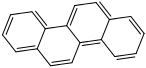

In [3]:
mol1

In [4]:
mol1.isAromatic()

False

In [5]:
SSSR = mol2.getSmallestSetOfSmallestRings()
SSSR

[[<Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>],
 [<Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>],
 [<Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>],
 [<Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>, <Atom 'C'>]]

In [6]:
for ring in SSSR:
    indexList = zip(range(6),range(1,6) + [0])
    bondList = []
    bonds = ''
    
    for index1, index2 in indexList:
        bond = mol2.getBond(ring[index1],ring[index2])
        bondList.append(bond)
        bonds += bond.order
    
    if bonds in ('DSDSDS', 'SDSDSD'):
        print "Alternating single and double bonds!"
        clar.clarTransformation(mol2,bondList)
    else:
        print "No alternating bonds: {0}".format(bonds)

Alternating single and double bonds!
No alternating bonds: BSSSDS
Alternating single and double bonds!
No alternating bonds: BSDSDS


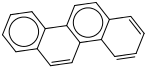

In [7]:
mol2

In [8]:
print mol2.toAdjacencyList()

1  C u0 p0 c0 {3,B} {6,S} {7,B}
2  C u0 p0 c0 {4,S} {5,B} {8,B}
3  C u0 p0 c0 {1,B} {4,S} {11,B}
4  C u0 p0 c0 {2,S} {3,S} {12,D}
5  C u0 p0 c0 {2,B} {6,S} {15,B}
6  C u0 p0 c0 {1,S} {5,S} {16,D}
7  C u0 p0 c0 {1,B} {9,S} {10,B}
8  C u0 p0 c0 {2,B} {13,S} {14,B}
9  C u0 p0 c0 {7,S} {17,D} {22,S}
10 C u0 p0 c0 {7,B} {18,B} {23,S}
11 C u0 p0 c0 {3,B} {18,B} {25,S}
12 C u0 p0 c0 {4,D} {19,S} {26,S}
13 C u0 p0 c0 {8,S} {19,D} {28,S}
14 C u0 p0 c0 {8,B} {20,B} {29,S}
15 C u0 p0 c0 {5,B} {20,B} {31,S}
16 C u0 p0 c0 {6,D} {17,S} {32,S}
17 C u0 p0 c0 {9,D} {16,S} {21,S}
18 C u0 p0 c0 {10,B} {11,B} {24,S}
19 C u0 p0 c0 {12,S} {13,D} {27,S}
20 C u0 p0 c0 {14,B} {15,B} {30,S}
21 H u0 p0 c0 {17,S}
22 H u0 p0 c0 {9,S}
23 H u0 p0 c0 {10,S}
24 H u0 p0 c0 {18,S}
25 H u0 p0 c0 {11,S}
26 H u0 p0 c0 {12,S}
27 H u0 p0 c0 {19,S}
28 H u0 p0 c0 {13,S}
29 H u0 p0 c0 {14,S}
30 H u0 p0 c0 {20,S}
31 H u0 p0 c0 {15,S}
32 H u0 p0 c0 {16,S}



In [9]:
mol2.isAromatic()

True

In [10]:
databasePath = rmgpy.settings['database.directory']

database = RMGDatabase()
database.load(
    path = databasePath,
    thermoLibraries = ['PAHLibrary'],
    reactionLibraries = [],
    seedMechanisms = [],
    kineticsFamilies = 'none'
    )

In [11]:
thermo1 = database.thermo.estimateThermoViaGroupAdditivity(mol1)
print thermo1.getEnthalpy(300) / 1000
print thermo1.getEntropy(300)

555.81067696
41.9253513333


In [12]:
thermo2 = database.thermo.estimateThermoViaGroupAdditivity(mol2)
print thermo2.getEnthalpy(300) / 1000
print thermo2.getEntropy(300)

463.477887142
112.119490009


In [13]:
spec = Species()
spec.molecule = [mol1]
spec.generateResonanceIsomers()
thermo3 = database.thermo.getThermoData(spec)
print thermo3.getEnthalpy(300) / 1000
print thermo3.getEntropy(300)

306.58460795
470.742114064


In [14]:
print thermo1.comment

Thermo group additivity estimation: group(Cds-Cds(Cds-Cds)(Cds-Cds)) + other(R) + group(Cds-Cds(Cds-Cds)(Cds-Cds)) + other(R) + group(Cds-Cds(Cds-Cds)(Cds-Cds)) + other(R) + group(Cds-Cds(Cds-Cds)(Cds-Cds)) + other(R) + group(Cds-Cds(Cds-Cds)(Cds-Cds)) + other(R) + group(Cds-Cds(Cds-Cds)(Cds-Cds)) + other(R) + group(Cds-Cds(Cds-Cds)(Cds-Cds)) + other(R) + group(Cds-Cds(Cds-Cds)(Cds-Cds)) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + polycyclic(naphthalene)


In [15]:
print thermo2.comment

Thermo group additivity estimation: group(Cb-(Cds-Cds)) + other(R) + group(Cb-(Cds-Cds)) + other(R) + group(Cb-(Cds-Cds)) + other(R) + group(Cds-CdsCbCb) + other(R) + group(Cb-(Cds-Cds)) + other(R) + group(Cds-CdsCbCb) + other(R) + group(Cb-(Cds-Cds)) + other(R) + group(Cb-(Cds-Cds)) + other(R) + group(Cds-CdsCbH) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-CdsCbH) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cb-H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cb-H) + other(R) + polycyclic(PolycyclicRing)


In [16]:
print thermo3.comment

Thermo library: PAHLibrary


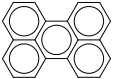

In [17]:
spec.molecule[1]

In [18]:
thermo4 = database.thermo.estimateThermoViaGroupAdditivity(spec.molecule[1])
print thermo4.getEnthalpy(300) / 1000
print thermo4.getEntropy(300)

280.836218765
464.377215383


In [19]:
print thermo4.comment

Thermo group additivity estimation: group(Cbf-CbfCbfCbf) + other(R) + group(Cbf-CbfCbfCbf) + other(R) + group(Cbf-CbCbfCbf) + other(R) + group(Cbf-CbCbfCbf) + other(R) + group(Cbf-CbCbfCbf) + other(R) + group(Cbf-CbCbfCbf) + other(R) + group(Cbf-CbCbCbf) + other(R) + group(Cbf-CbCbCbf) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + polycyclic(PolycyclicRing)
